# 4.1 Aussagekräftige Felder

In [25]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Datensatz laden
df = pd.read_excel('Top_spotify_songs-entire.xlsx')

# Eingabefelder (Features) und Zielvariable (Target) definieren
X = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']]
y = df['popularity']

# Random-Forest-Modell trainieren, um Feature-Bedeutungen zu bestimmen
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Wichtigkeit der Features extrahieren und sortieren
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Ergebnisse anzeigen
print(feature_importances)

        Feature  Importance
3      loudness    0.200967
5   speechiness    0.130911
6  acousticness    0.117851
8       valence    0.115796
9         tempo    0.110517
1        energy    0.099459
0  danceability    0.096253
7      liveness    0.070296
2           key    0.044726
4          mode    0.013225


# 4.2: Messmatrik berechnen

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Datensatz laden
df = pd.read_excel('Top_spotify_songs-entire.xlsx')

# Eingabefelder (Features) und Zielvariable (Target) definieren
X = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']]

# Zielvariable kategorisieren: 0 = nicht beliebt, 1 = beliebt
threshold = 50
y = (df['popularity'] >= threshold).astype(int)

# Daten in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Klassifikationsmodell initialisieren und trainieren
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Vorhersagen generieren
y_pred = model.predict(X_test)

# Metriken berechnen
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Ergebnisse anzeigen
print(f"Accuracy (Genauigkeit): {accuracy:.4f}")
print(f"F1-Mass: {f1:.4f}")

Accuracy (Genauigkeit): 0.9852
F1-Mass: 0.9922


# 4.3: Wahrheitsmatrix, Sensitivität und Spezifität

Wahrheitsmatrix:
[[ 220   55]
 [  19 4706]]
True Positives (TP): 4706
True Negatives (TN): 220
False Positives (FP): 55
False Negatives (FN): 19
Recall: 0.99598
Precision: 0.98845


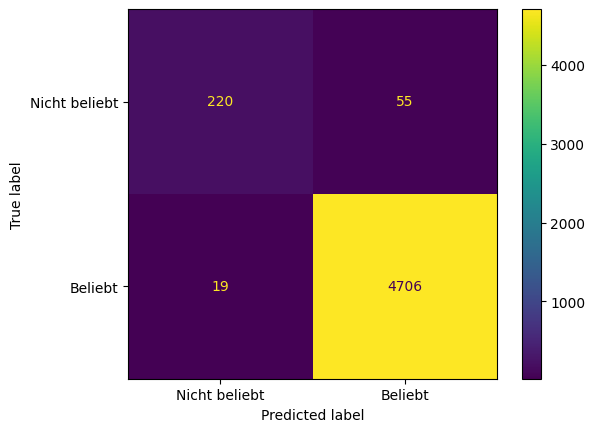

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Datensatz laden
df = pd.read_excel('Top_spotify_songs-entire.xlsx')

# Eingabefelder (Features) und Zielvariable (Target) definieren
X = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']]

# Zielvariable (0 = nicht beliebt, 1 = beliebt)
threshold = 50
y = (df['popularity'] >= threshold).astype(int)

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Random Forest Classifier Modell initialisieren und trainieren
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Vorhersagen generieren
y_pred = model.predict(X_test)

# Wahrheitsmatrix berechnen
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()  # True Negative, False Positive, False Negative, True Positive

# Wahrheitsmatrix visualisieren
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Nicht beliebt', 'Beliebt'])
disp.plot()

# Metriken berechnen
recall = recall_score(y_test, y_pred)  # Sensitivität
precision = precision_score(y_test, y_pred)  # Spezifität

# Wahrheitsmatrix berechnen
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Ergebnisse anzeigen
print("Wahrheitsmatrix:")
print(cm)
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"Recall: {recall:.5f}")
print(f"Precision: {precision:.5f}")

# 4.4 Zusammenfassung

Das Modell zeigt eine solide Leistung in der Klassifikation von Songs als "beliebt" oder "nicht beliebt". Mit einer **Accuracy** von 98% und einem **F1-Score** von 99% erreicht es eine gute Balance zwischen Präzision und Sensitivität. Die wichtigsten Features wie **loudness**, **speechiness** und **acousticness** tragen massgeblich zur Vorhersage bei. 

**Hypothesen:**
1. Die ausgewählten Features korrelieren stark mit der Popularität von Songs.
2. Das Random-Forest-Modell kann gut mit irrelevanten oder zufälligen Schwankungen in den Daten umgehen, da es durch die Kombination vieler Entscheidungsbäume robuste Vorhersagen trifft.
3. Verbesserungen könnten durch Hinzufügen weiterer Features wie Genre oder Veröffentlichungsjahr erzielt werden.